In [1]:
import cv2
import matplotlib.pyplot as plt

### Rainbow 이미지 불러오기

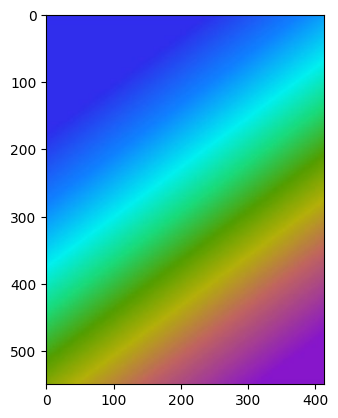

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../data/rainbow.jpg")
plt.imshow(img);

### 그레이 스케일로 읽기 하지만 imshow에 cmap을 주지 않아.. 그레이스케일 이미지에서는 기본적으로 viridis컬러맵이 나온다!

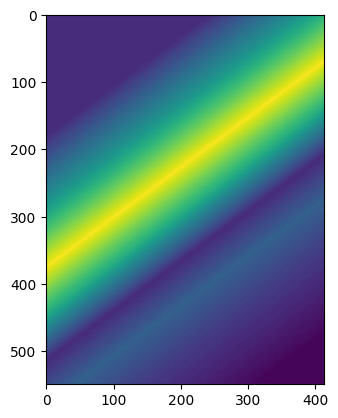

In [4]:
img = cv2.imread("../data/rainbow.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img);

### 그러면 이제 cmap으로 gray주기

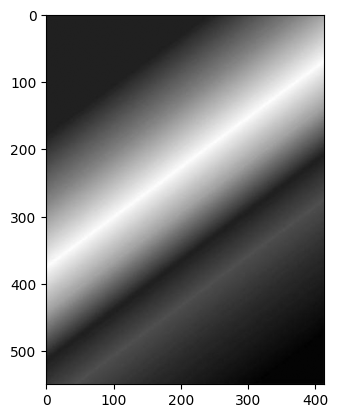

In [5]:
plt.imshow(img, cmap="gray");

### THRESH_BINARY 사용.
- 임계값보다 작으면 0, 크면 1

127.0


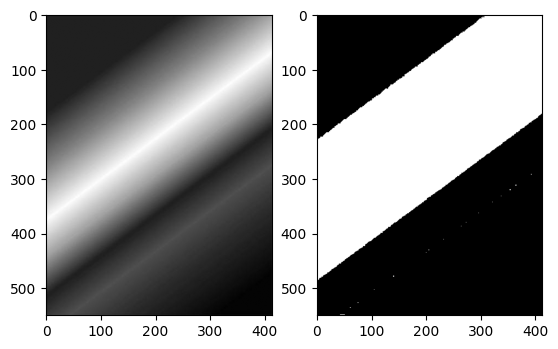

In [8]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(thresh1, cmap="gray")
plt.show()

### THRESH_TRUNC 사용
- 임계값 보다 크다 => 1.
- 그 외 원래 값 유지

127.0


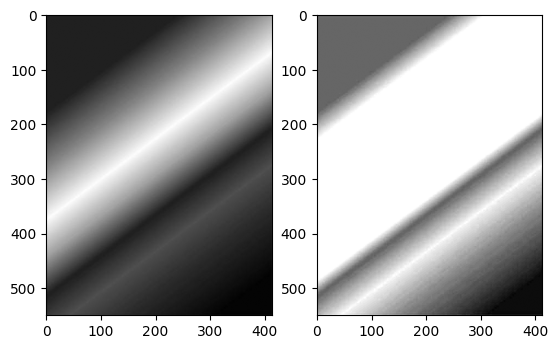

In [15]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
print(ret)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(thresh1, cmap="gray")
plt.show()

### THRESH_TOZERO
- 임계값보다 작으면 0

127.0


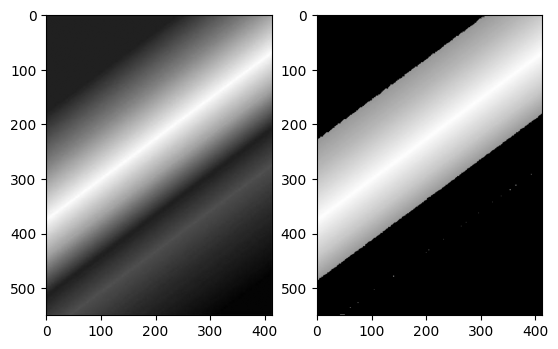

In [17]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
print(ret)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(thresh1, cmap="gray")
plt.show()

### THRESH_TOZERO_INV
- 임계값보다 크면 0
- 임계값보다 작으면 그대로

127.0


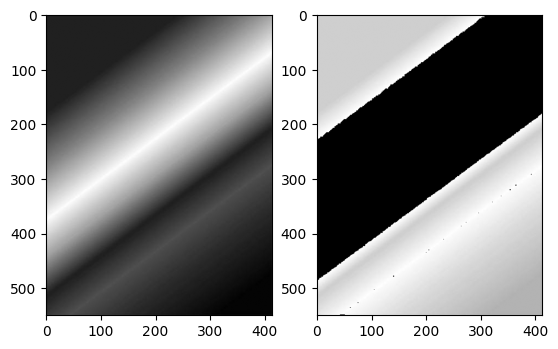

In [24]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
print(ret)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(thresh1, cmap="gray")
plt.show()

### crossword 파일 불러오기

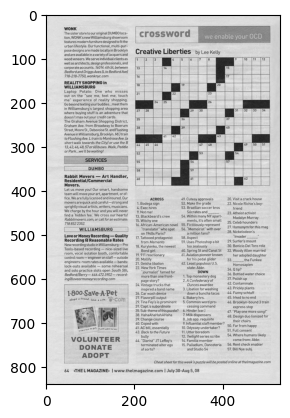

In [28]:
img = cv2.imread("../data/crossword.jpg", 0)
plt.imshow(img, cmap="gray")

### show_pic 그림이 작아서 앞으로 잘 보기 위해 함수 선언

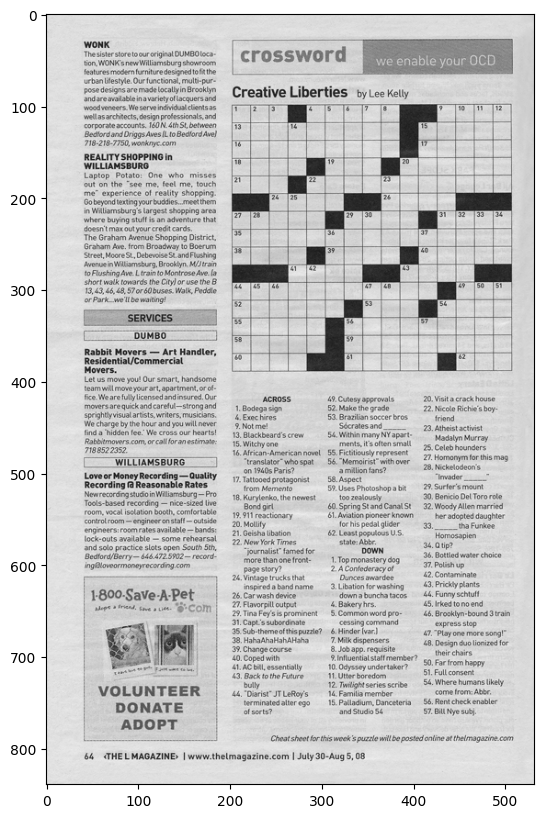

In [34]:
def show_pic(img):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

show_pic(img)

### thresh_binary로 간단하게 확인.
- 경계가 많이 모호해지고 알아보기가 힘들어짐

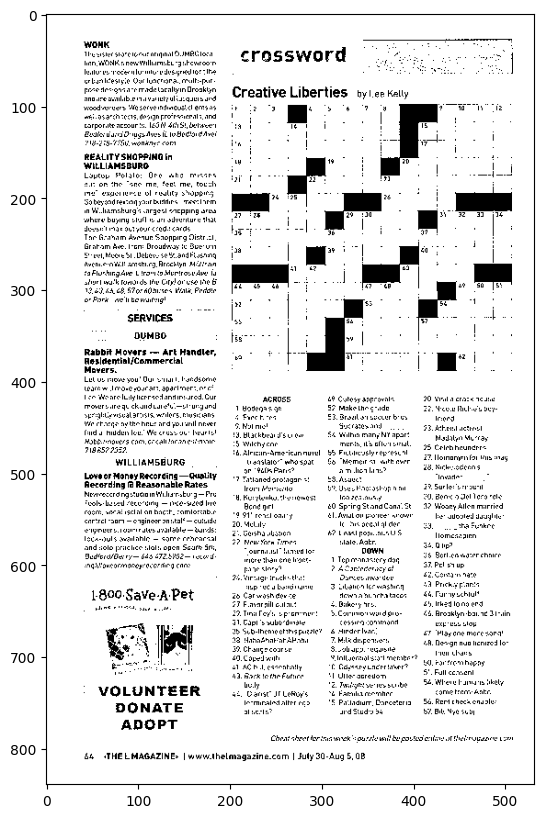

In [35]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_pic(thresh1)

### threshold 값을 바꿔서!
- 잘 나오긴 했는데, 항상 이렇게 바꿔가면서 할 수 없기때문에...

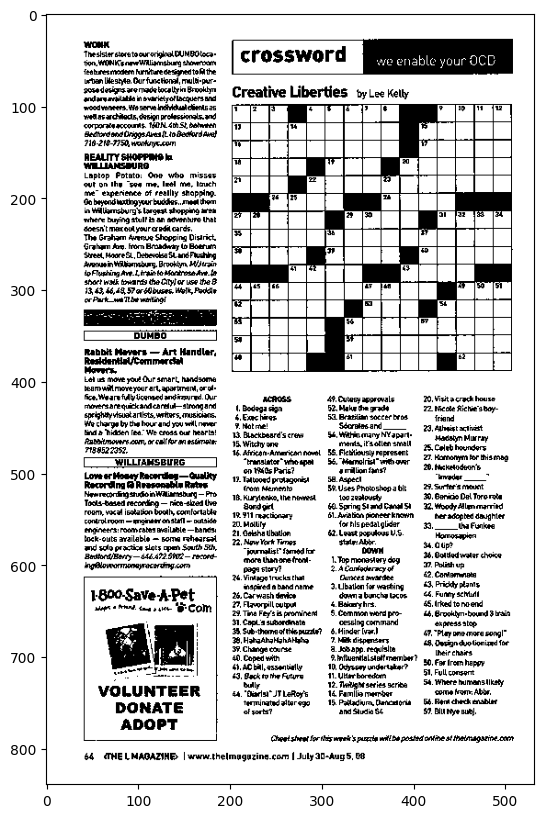

In [36]:
ret, thresh1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
show_pic(thresh1)

### adaptive threshold라는 것이 있음.

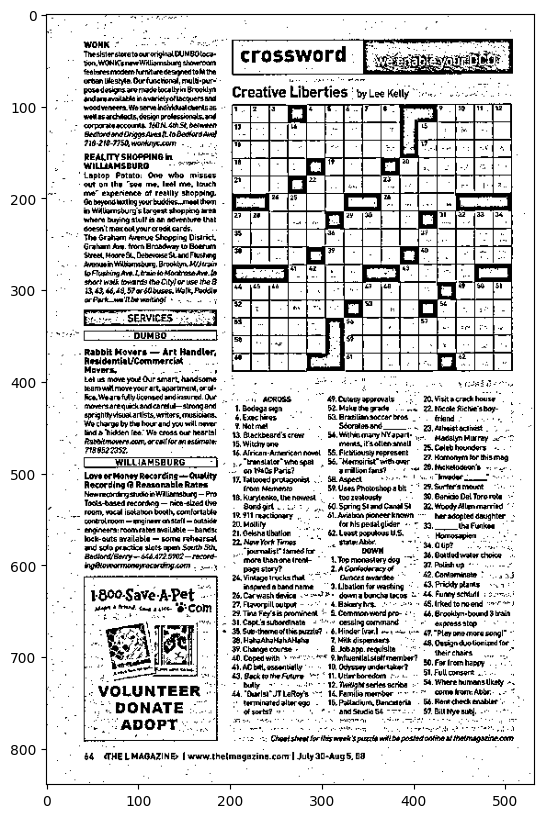

In [37]:
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(thresh2)

### 확인을 위해 addWeighted 로 겹쳐보기!

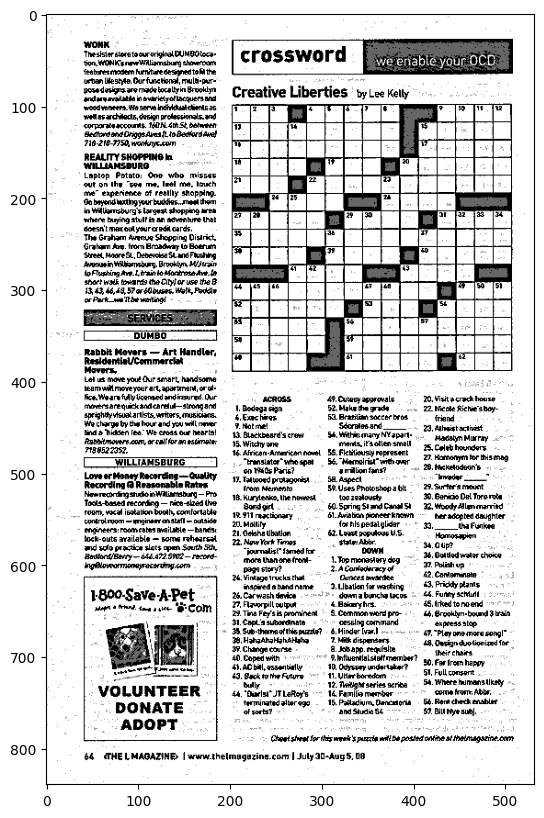

In [38]:
blended = cv2.addWeighted(src1=thresh1, alpha=0.6, src2=thresh2, beta=0.4, gamma=0)
show_pic(blended)

### gaussian 방법으로!

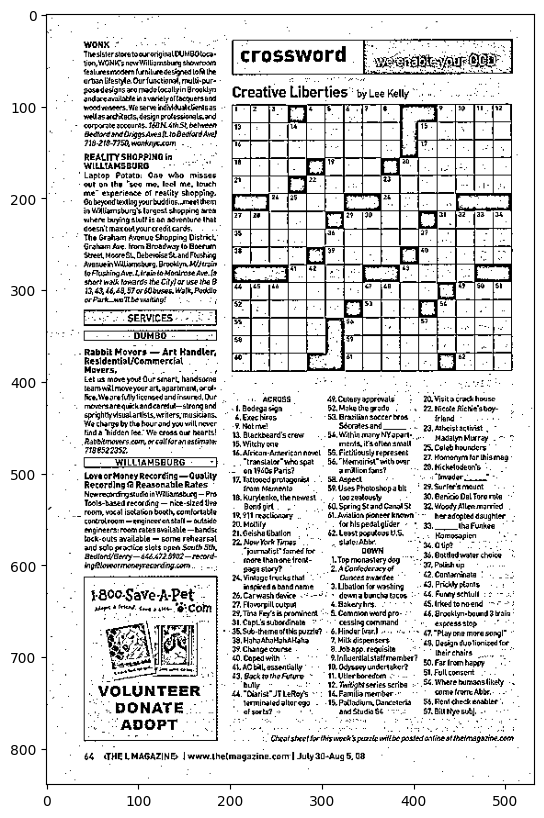

In [39]:
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(thresh2)

### 이번에도 합쳐서 확인!

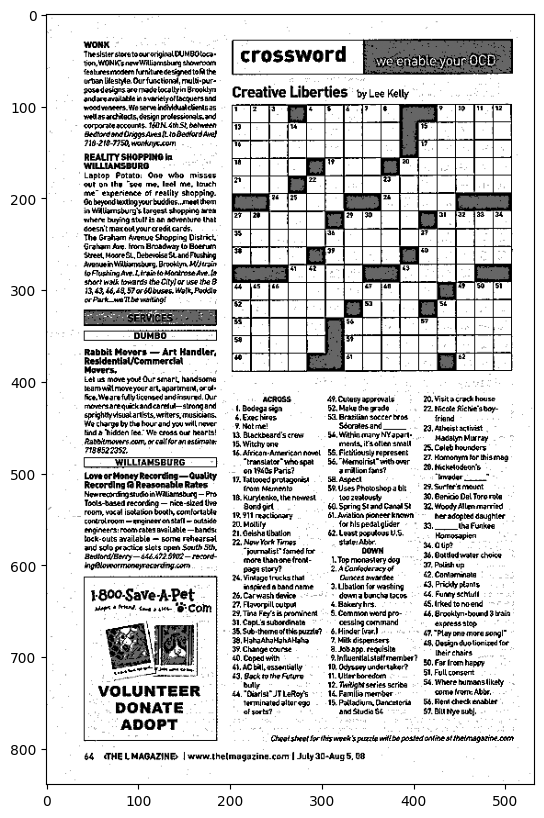

In [40]:
blended = cv2.addWeighted(src1=thresh1, alpha=0.6, src2=thresh2, beta=0.4, gamma=0)
show_pic(blended)